<a href="https://colab.research.google.com/github/vaishnavi7599/aquaponics/blob/main/mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("/content/training_farm_data.csv")
data



,location,calcium,magnesium,sodium,potassium,boron,carbonate,bicarbonate,sulfate,chloride,nitrates,pH,conductivity,hardness_1,hardness_2,alkalinity,total_dissolved_salts,sar,yield
0,Farm_C,877.339353,40.728802,280.963190,506.141863,586.229832,829.741804,176.528032,32.526179,706.777217,601.611820,5.261205,1575.750058,237.206584,268.555631,306.219812,191.703149,3.177040,118.8
1,Farm_A,289.751453,140.084015,631.837212,756.163329,124.297224,373.309316,924.396195,634.005703,182.117916,797.813649,6.307387,1385.289081,76.368425,69.742291,218.548799,861.329296,9.671493,96.3
2,Farm_C,632.305831,962.648415,374.870580,975.610201,821.257305,487.431198,17.873935,638.525948,514.817354,539.161277,7.740366,253.142876,232.874123,99.024428,293.767166,568.152903,8.031897,111.0
3,Farm_C,497.248506,127.060513,986.001064,919.391973,116.898041,181.435435,997.934110,683.295377,276.827797,812.985739,4.410858,450.504881,70.866021,76.056201,390.296126,303.426098,1.591254,111.9
4,Farm_A,817.222200,474.173829,455.656753,640.826315,18.110184,136.885630,779.584474,796.537291,36.671427,228.079772,8.209993,163.865840,138.093737,298.204210,227.811984,858.440712,1.686153,100.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Farm_A,779.875546,856.489841,813.795020,239.180104,925.568513,738.033616,224.440572,455.220149,936.605692,95.535314,5.067557,199.289971,259.260281,50.391276,407.394798,733.471383,8.138286,96.9
756,Farm_A,898.554189,642.419278,822.537243,101.045811,838.898086,389.295614,580.086208,479.938835,933.875018,168.014208,6.711186,1964.464472,178.163688,64.881175,116.958186,699.746872,2.772331,99.0
757,Farm_C,518.790622,286.541252,84.837714,553.802241,232.212695,293.147730,870.098874,758.263196,438.615419,380.195619,4.870547,324.838763,96.056210,201.772395,222.893021,823.134469,9.087045,116.4
758,Farm_C,535.774684,695.974206,868.599128,822.480564,846.452292,799.855256,427.773134,274.215202,592.950851,610.333783,7.282393,1043.276189,264.544263,120.170804,425.142483,797.811535,2.322664,117.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               760 non-null    object 
 1   calcium                760 non-null    float64
 2   magnesium              760 non-null    float64
 3   sodium                 760 non-null    float64
 4   potassium              760 non-null    float64
 5   boron                  760 non-null    float64
 6   carbonate              760 non-null    float64
 7   bicarbonate            760 non-null    float64
 8   sulfate                760 non-null    float64
 9   chloride               760 non-null    float64
 10  nitrates               760 non-null    float64
 11  pH                     760 non-null    float64
 12  conductivity           760 non-null    float64
 13  hardness_1             760 non-null    float64
 14  hardness_2             760 non-null    float64
 15  alkali

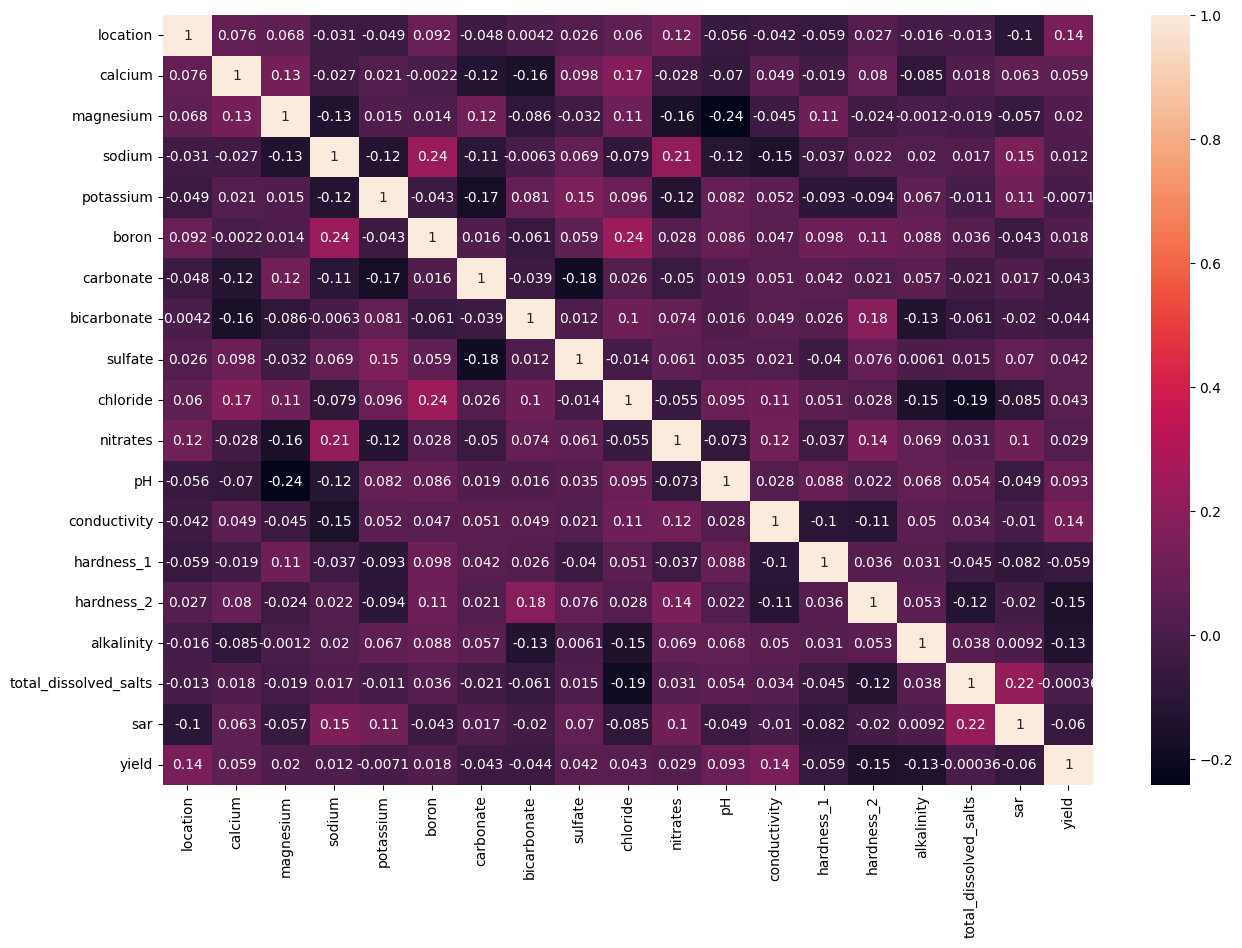

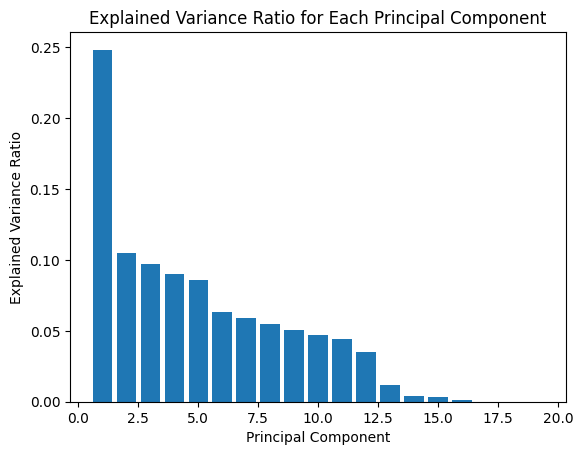

0.9997982326705093
0.25938157894740704 0.3077830657894817 0.001928352881846946
0.9317177110693763
2.4414473684210534 100.65078947368424 0.016427366833315787
0.9990914214602918
0.8864824768827286 1.3710833779223714 0.007006107639575934
0.9941535831133195
2.466341689029797 8.906719230458231 0.01879351542754364


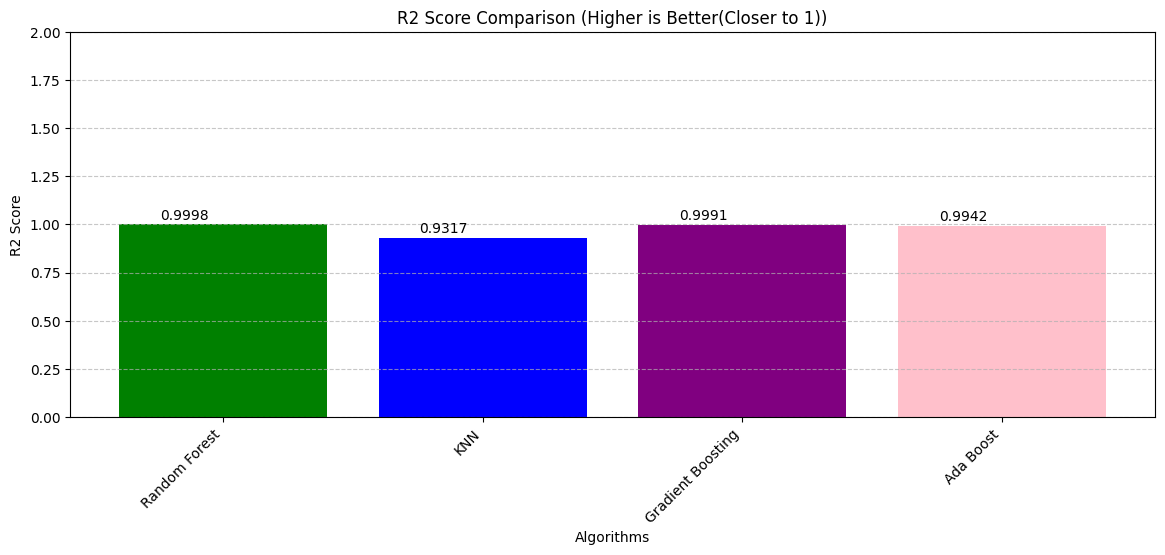

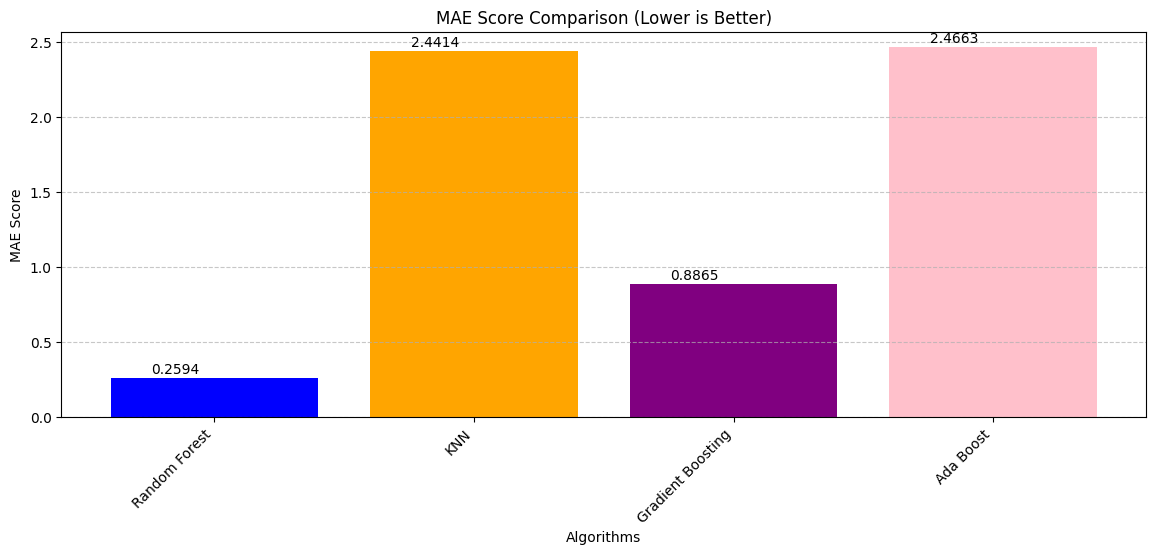

Predicted yield for data: 195.07800000000006 kgs
Predicted yield for data: 101.523 kgs
Predicted yield for data: 109.34999999999982 kgs


In [ ]:
data.info()

data.location.value_counts()

LE = LabelEncoder()
data['location'] = LE.fit_transform(data['location'])

data

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

pca = PCA()
principal_components = pca.fit_transform(data)

explained_variance_ratio = pca.explained_variance_ratio_

# Bar plot of explained variance ratio for each principal component
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

X = data.drop(columns=['yield'])
y = data['yield']

scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(Scaled_X,y,test_size=0.2,random_state=40)

## model initialization
rf = RandomForestRegressor()

## model training
rf.fit(X_train,y_train)

## model testing
rf_pred = rf.predict(X_test)

## model Evaluation
rf_score = r2_score(rf_pred,y_test)
print(rf_score)

rf_mae = mean_absolute_error(rf_pred,y_test)
rf_mse = mean_squared_error(rf_pred,y_test)
rf_mape = mean_absolute_percentage_error(rf_pred,y_test)
print(rf_mae, rf_mse, rf_mape)

## model initialization
knn = KNeighborsRegressor(n_neighbors=2)

## model training
knn.fit(X_train,y_train)

## model testing
knn_pred = knn.predict(X_test)

## model Evaluation
knn_score = r2_score(knn_pred,y_test)
print(knn_score)

knn_mae = mean_absolute_error(knn_pred,y_test)
knn_mse = mean_squared_error(knn_pred,y_test)
knn_mape = mean_absolute_percentage_error(knn_pred,y_test)
print(knn_mae, knn_mse, knn_mape)

## model initialization
gb = GradientBoostingRegressor()

## model training
gb.fit(X_train,y_train)

## model testing
gb_pred = gb.predict(X_test)

## model Evaluation
gb_score = r2_score(gb_pred,y_test)
print(gb_score)

gb_mae = mean_absolute_error(gb_pred,y_test)
gb_mse = mean_squared_error(gb_pred,y_test)
gb_mape = mean_absolute_percentage_error(gb_pred,y_test)
print(gb_mae, gb_mse, gb_mape)

## model initialization
ab = AdaBoostRegressor()

## model training
ab.fit(X_train,y_train)

## model testing
ab_pred = ab.predict(X_test)

## model Evaluation
ab_score = r2_score(ab_pred,y_test)
print(ab_score)

ab_mae = mean_absolute_error(ab_pred,y_test)
ab_mse = mean_squared_error(ab_pred,y_test)
ab_mape = mean_absolute_percentage_error(ab_pred,y_test)
print(ab_mae, ab_mse, ab_mape)

algorithms = ["Random Forest", "KNN", "Gradient Boosting", "Ada Boost"]
score = [rf_score, knn_score, gb_score, ab_score]

plt.figure(figsize=[14, 5])
bars = plt.bar(algorithms, score, color=['green', 'blue', 'purple', 'pink'])

# Add data labels
for bar, val in zip(bars, score):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f"{val:.4f}", ha='center', va='bottom')

plt.xlabel("Algorithms")
plt.ylabel("R2 Score")
plt.title("R2 Score Comparison (Higher is Better(Closer to 1))")
plt.ylim(0,2)  # Adjust y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

plt.show()

algorithms = ["Random Forest", "KNN", "Gradient Boosting", "Ada Boost"]
mae = [rf_mae, knn_mae, gb_mae, ab_mae]

plt.figure(figsize=[14, 5])
#bars = plt.bar(algorithms, mae, color=['blue', 'green', 'orange', 'purple', 'pink',])
bars = plt.bar(algorithms, mae, color=['blue', 'orange', 'purple', 'pink',])


# Add data labels
for bar, val in zip(bars, mae):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, round(val, 4), ha='center', va='bottom')

plt.xlabel("Algorithms")
plt.ylabel("MAE Score")
plt.title("MAE Score Comparison (Lower is Better)")
plt.ylim(0, max(mae) + 0.1)  # Adjust y-axis limits for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Beautify x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

def predict_class(input):
    data = scaler.transform([input])
    pred = rf.predict(data)
    result = f"Predicted yield for data: {pred[0]} kgs"
    return result

print(predict_class([1,160.808051,643.288218,866.063890,615.219438,399.002704,476.050402,955.651498,39.618825,965.118696,641.971500,8.366615,1946.810126,284.576205,142.263255,218.898459,194.828430,3.335876]))

print(predict_class([0,9.418057,398.504734,1,583.656112,0.761586,707.238634,19,2.4727,585.354364,353.421379,8.923349,759.952320,219.044391,276.902751,459.254575,449,1.9]))

print(predict_class([2,367.7158031,318.9756303,273.4070719,11.03126443,452.4395161,75.13778174,76.13085949,350.6269312,673.4324333,991.2559937,7.66535648,1444.886685,145.1001372,278.3217369,480.2212146,474.8539887,2.455042926]))

